Attempting to load MNIST dataset.
This command will automatically download the data if it is your first time running it.
Download and loading complete.
You now have 60000 training images.
Shape of the image data: (60000, 28, 28)


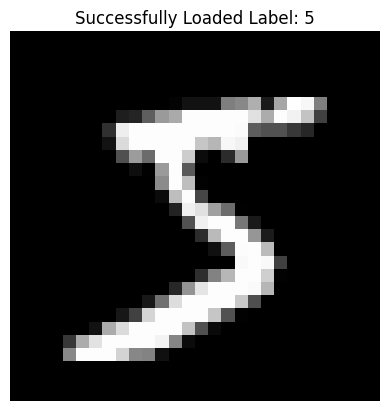

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print("Attempting to load MNIST dataset.")
print("This command will automatically download the data if it is your first time running it.")

# This line handles the download and loading
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Download and loading complete.")
print(f"You now have {len(X_train)} training images.")
print(f"Shape of the image data: {X_train.shape}")


# Display the first image to confirm it worked
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Successfully Loaded Label: {y_train[0]}")
plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
import pickle
import os
import numpy as np

# 1. Load and Preprocess Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# 2. Define and Train Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, verbose=1)

# 3. Save with Pickle
# Keras models can be pickled, but it is less stable than the .keras format
with open('mnist_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("\nModel saved using pickle as 'mnist_model.pkl'")

# 4. Calculate Memory Size
# Estimated memory is based on parameters (weights) and their data type
def get_model_memory_size(model):
    # Total parameters * 4 bytes (for float32)
    num_params = model.count_params()
    size_bytes = num_params * 4
    size_mb = size_bytes / (1024 * 1024)
    return num_params, size_mb

params, memory_mb = get_model_memory_size(model)
file_size_kb = os.path.getsize('mnist_model.pkl') / 1024

print(f"Total Parameters: {params:,}")
print(f"Estimated Runtime Memory Size: {memory_mb:.4f} MB")
print(f"Pickle File Size on Disk: {file_size_kb:.2f} KB")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8598 - loss: 0.4889
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9555 - loss: 0.1537
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9674 - loss: 0.1088
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9738 - loss: 0.0871
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9778 - loss: 0.0714
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0603
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9829 - loss: 0.0540
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0517
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9856 - loss: 0.0424
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9875 - loss: 0.0389

Model saved using pickle as 'mnist_model.pkl'
Total Parameters: 101,770
Estimated Runtime Memory Size: 0.3882 MB
Pick

In [10]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [13]:
import tensorflow as tf
import numpy as np
import pickle
import os

# 1. Load and Preprocess Data
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1] range for higher accuracy
X_train, X_test = X_train / 255.0, X_test / 255.0

# 2. Build Your Model (CNN Architecture)
# CNNs typically reach 99%+ accuracy on MNIST
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(), # Flattens multidimensional data to 1D
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 3. Compile and Train
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("\nStarting training...")
model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)

# 4. Evaluate Accuracy
# model.evaluate compares predictions against true labels
print("\nEvaluating on test data...")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")

# 5. Calculate Memory Size
# Estimated RAM size = (Parameters * 4 bytes for float32) / 1024 / 1024
params = model.count_params()
memory_size_mb = (params * 4) / (1024 * 1024)
print(f"Total Parameters: {params:,}")
print(f"Estimated Runtime Memory Size: {memory_size_mb:.4f} MB")

# 6. Save Model (Recommended & Pickle)
# Standard .keras format
model.save('mnist_model.keras')

# Save using Pickle
with open('mnist_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print(f"\nModel saved to current directory: {os.getcwd()}")
print(f"Pickle File Size: {os.path.getsize('mnist_model.pkl') / 1024:.2f} KB")


Loading MNIST dataset...

Starting training...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.8115 - loss: 0.7126
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9509 - loss: 0.1713
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9609 - loss: 0.1291
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9678 - loss: 0.1086
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9729 - loss: 0.0925

Evaluating on test data...
Final Test Accuracy: 97.96%
Total Parameters: 54,410
Estimated Runtime Memory Size: 0.2076 MB

Model saved to current directory: /content
Pickle File Size: 664.80 KB
